In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
import duckdb as db
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("covid_19_indonesia_time_series_all.csv")
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
data['Date'] = data['Date'].map(parser.parse)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

In [5]:
def query(sql_query:str) -> pd.DataFrame:
    return db.sql(sql_query).df()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

Analisis Kasus Covid Indonesia Berdasarkan Tahun

In [7]:
analisis_1 = data.dropna(subset=['Island'])
analisis_1 = analisis_1.select_dtypes(exclude=['object'])

columns_to_keep = list(analisis_1.columns[:5]) + list(analisis_1.columns[-2:])

analisis_1 = analisis_1[columns_to_keep]
analisis_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         30893 non-null  datetime64[ns]
 1   New Cases                    30893 non-null  int64         
 2   New Deaths                   30893 non-null  int64         
 3   New Recovered                30893 non-null  int64         
 4   New Active Cases             30893 non-null  int64         
 5   Growth Factor of New Cases   28958 non-null  float64       
 6   Growth Factor of New Deaths  27451 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.9 MB


In [8]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in analisis_1.iloc[:, 1:]])

analisis_1 = query(f'''SELECT YEAR(Date) AS Year, {sum_col}
                    FROM analisis_1 GROUP BY YEAR(Date)
                    ORDER BY YEAR(Date)''')
analisis_1

,Year,New Cases,New Deaths,New Recovered,New Active Cases,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020,750848.0,22993.0,623760.0,104095.0,13074.25,8551.09
1,2021,3511801.0,121143.0,3490312.0,-99654.0,15970.01,12321.18
2,2022,2134660.0,13683.0,2090481.0,30496.0,9647.51,7435.50


In [9]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Scatter(x=analisis_1['Year'], y=analisis_1['Growth Factor of New Cases'], mode='lines', name='Kasus Baru', fill='tozeroy'))
fig.add_trace(go.Scatter(x=analisis_1['Year'], y=analisis_1['Growth Factor of New Deaths'], mode='lines', name='Kasus Kematian', fill='tozeroy'))

fig.update_xaxes(title='Tahun', tickvals=analisis_1['Year'], ticktext=[str(year) for year in analisis_1['Year']])
fig.update_yaxes(title='Jumlah')
fig.update_layout(title='Rasio Pertumbuhan Kasus Covid di Indonesia pada Tahun 2020 - 2022')

fig.write_html("g_1.html")
fig.show()

In [10]:
values = analisis_1.iloc[:, 1:5]

fig = make_subplots(rows=1, cols=1)

for col in values.columns:
    fig.add_trace(go.Scatter(x=analisis_1['Year'], y=values[col], name=col, mode='lines',
                            hovertemplate=f'Category: {col}<br>' +
                                        'Value: %{y:.2f}<extra></extra>'))

fig.update_xaxes(title='Tahun', tickvals=analisis_1['Year'], ticktext=[str(year) for year in analisis_1['Year']])
fig.update_yaxes(title='Jumlah')
fig.update_layout(title='Rincian Kasus Covid di Indonesia pada Tahun 2020 - 2022', barmode='group')

fig.write_html("g_2.html")
fig.show()

Analisis Kasus Covid Indonesia Berdasarkan Pulau

In [11]:
analisis_2 = data.dropna(subset=['Island'])
analisis_2 = analisis_2.select_dtypes(exclude=['object']) 

columns_to_keep = list(analisis_2.columns[np.r_[1:5, 15:23]]) + list(analisis_2.columns[-2:])

analisis_2 = analisis_2[columns_to_keep]
analisis_2 = analisis_2.drop(columns=["Longitude", "Latitude", "Total Cases per Million"])
analisis_2 = analisis_2.join(data["Island"])
analisis_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   New Cases                    30893 non-null  int64  
 1   New Deaths                   30893 non-null  int64  
 2   New Recovered                30893 non-null  int64  
 3   New Active Cases             30893 non-null  int64  
 4   Area (km2)                   30893 non-null  int64  
 5   Population                   30893 non-null  int64  
 6   Population Density           30893 non-null  float64
 7   New Cases per Million        30893 non-null  float64
 8   New Deaths per Million       30893 non-null  float64
 9   Growth Factor of New Cases   28958 non-null  float64
 10  Growth Factor of New Deaths  27451 non-null  float64
 11  Island                       30893 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ MB


In [12]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in analisis_2.iloc[:, :11]])

analisis_2 = query(f'''SELECT Island, {sum_col}
                    FROM analisis_2 GROUP BY Island
                    ORDER BY Island''')
analisis_2

,Island,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density,New Cases per Million,New Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
0,Jawa,4382330.0,105515.0,4246611.0,30204.0,119043294.0,1.356114e+11,2.023691e+07,281491.88,5391.30,6746.63,5830.97
1,Kalimantan,465732.0,11862.0,453092.0,778.0,492713475.0,1.466891e+10,1.747113e+05,185377.11,4397.09,5274.34,4096.53
2,Maluku,33331.0,628.0,32640.0,63.0,71606493.0,2.863341e+09,7.283519e+04,21302.73,413.88,2240.63,1429.22
3,Nusa Tenggara,297493.0,7160.0,289742.0,591.0,65367068.0,1.342869e+10,1.024308e+06,63894.55,1574.76,3652.40,2521.60
4,Papua,82097.0,963.0,80760.0,374.0,382653053.0,4.971089e+09,2.235404e+04,39704.80,470.16,2687.72,1443.43
5,Sulawesi,313608.0,6880.0,305849.0,879.0,171165682.0,1.852658e+10,6.394924e+05,87541.48,2191.23,7360.35,4493.80
6,Sumatera,822718.0,24811.0,795859.0,2048.0,437849524.0,5.260220e+10,1.213989e+06,191792.03,5342.04,10729.70,8492.22


In [13]:
data_new = data.dropna(subset=['Island'])

In [14]:
x = set(data_new.iloc[:, np.r_[16, 24:27]].apply(tuple, axis=1).unique())
df = pd.DataFrame(x, columns=['Island', 'Area (km2)', 'Population', 'Population Density'])

island_areas = {}

for index, row in df.iterrows():
    island = row['Island']
    area = row['Area (km2)']
    population = row['Population']
    density = row['Population Density']
    
    if island in island_areas:
        island_areas[island]['Area (km2)'] += area
        island_areas[island]['Population'] += population
        island_areas[island]['Population Density'] += density
    else:
        island_areas[island] = {'Area (km2)': area, 'Population': population, 'Population Density': density}

unique_island_area = dict(island_areas.items())
unique_island_area

{'Sulawesi': {'Area (km2)': 188562,
  'Population': 20400432,
  'Population Density': 706.78},
 'Nusa Tenggara': {'Area (km2)': 73070,
  'Population': 14897739,
  'Population Density': 1124.27},
 'Papua': {'Area (km2)': 421991,
  'Population': 5481049,
  'Population Density': 24.68},
 'Jawa': {'Area (km2)': 129442,
  'Population': 147203954,
  'Population Density': 21834.82},
 'Kalimantan': {'Area (km2)': 544151,
  'Population': 16216750,
  'Population Density': 193.5},
 'Sumatera': {'Area (km2)': 480793,
  'Population': 57830696,
  'Population Density': 1337.37},
 'Maluku': {'Area (km2)': 78897,
  'Population': 3154900,
  'Population Density': 80.25999999999999}}

In [15]:
new_dict = {}

for key, value in unique_island_area.items():
    numeric_values = list(value.values())
    new_dict[key] = numeric_values

new_dict

{'Sulawesi': [188562, 20400432, 706.78],
 'Nusa Tenggara': [73070, 14897739, 1124.27],
 'Papua': [421991, 5481049, 24.68],
 'Jawa': [129442, 147203954, 21834.82],
 'Kalimantan': [544151, 16216750, 193.5],
 'Sumatera': [480793, 57830696, 1337.37],
 'Maluku': [78897, 3154900, 80.25999999999999]}

In [16]:
for column in ['Area (km2)', 'Population', 'Population Density']:
    if column == 'Area (km2)':
        analisis_2['Area (km2)'] = analisis_2['Island'].map(lambda x: new_dict[x][0])
    if column == 'Population':
        analisis_2['Population'] = analisis_2['Island'].map(lambda x: new_dict[x][1])    
    if column == 'Population Density':
        analisis_2['Population Density'] = analisis_2['Island'].map(lambda x: new_dict[x][2])  

analisis_2

,Island,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density,New Cases per Million,New Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
0,Jawa,4382330.0,105515.0,4246611.0,30204.0,129442,147203954,21834.82,281491.88,5391.30,6746.63,5830.97
1,Kalimantan,465732.0,11862.0,453092.0,778.0,544151,16216750,193.50,185377.11,4397.09,5274.34,4096.53
2,Maluku,33331.0,628.0,32640.0,63.0,78897,3154900,80.26,21302.73,413.88,2240.63,1429.22
3,Nusa Tenggara,297493.0,7160.0,289742.0,591.0,73070,14897739,1124.27,63894.55,1574.76,3652.40,2521.60
4,Papua,82097.0,963.0,80760.0,374.0,421991,5481049,24.68,39704.80,470.16,2687.72,1443.43
5,Sulawesi,313608.0,6880.0,305849.0,879.0,188562,20400432,706.78,87541.48,2191.23,7360.35,4493.80
6,Sumatera,822718.0,24811.0,795859.0,2048.0,480793,57830696,1337.37,191792.03,5342.04,10729.70,8492.22


In [17]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(x=analisis_2['Island'], y=analisis_2['Growth Factor of New Cases'], name='Kasus Baru'))
fig.add_trace(go.Bar(x=analisis_2['Island'], y=analisis_2['Growth Factor of New Deaths'], name='Kasus Kematian'))                  

fig.update_xaxes(title='Pulau')
fig.update_yaxes(title='Jumlah')
fig.update_layout(title='Rasio Kasus Covid di Pulau Indonesia', barmode='stack')

fig.write_html("g_3.html")
fig.show()

In [18]:
values = analisis_2.iloc[:, 1:5]

fig = make_subplots(rows=1, cols=1)

for col in values.columns:
    fig.add_trace(go.Bar(x=analisis_2['Island'], y=values[col], name=col,
                            hovertemplate=f'Category: {col}<br>' +
                                        'Value: %{y:.2f}<extra></extra>'))

fig.update_xaxes(title='Pulau')
fig.update_yaxes(title='Jumlah')
fig.update_layout(title='Rincian Kasus Covid di Pulau Indonesia', barmode='group')

fig.write_html("g_4.html")
fig.show()

In [19]:
values = analisis_2.iloc[:, 8:10]

fig = make_subplots(rows=1, cols=1)

for col in values.columns:
    fig.add_trace(go.Bar(x=analisis_2['Island'], y=values[col], name=col,
                            hovertemplate=f'Category: {col}<br>' +
                                        'Value: %{y:.2f}<extra></extra>'))

fig.update_xaxes(title='Pulau')
fig.update_yaxes(title='Jumlah')
fig.update_layout(title='Rincian Kasus Covid per Populasi di Pulau Indonesia', barmode='group')

fig.write_html("g_5.html")
fig.show()

Analisis Kasus Covid Indonesia Berdasarkan Pulau & Tahun

In [20]:
analisis_3 = data.dropna(subset=['Island'])
analisis_3 = analisis_3.select_dtypes(exclude=['object']) 	
analisis_3 = analisis_3.drop(columns=["City or Regency", "Total Regencies", "Total Cities", "Total Districts", 
                                      "Total Urban Villages", "Total Rural Villages", "Longitude", "Latitude"])
analisis_3 = analisis_3.join(data["Island"])
analisis_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         30893 non-null  datetime64[ns]
 1   New Cases                    30893 non-null  int64         
 2   New Deaths                   30893 non-null  int64         
 3   New Recovered                30893 non-null  int64         
 4   New Active Cases             30893 non-null  int64         
 5   Total Cases                  30893 non-null  int64         
 6   Total Deaths                 30893 non-null  int64         
 7   Total Recovered              30893 non-null  int64         
 8   Total Active Cases           30893 non-null  int64         
 9   Area (km2)                   30893 non-null  int64         
 10  Population                   30893 non-null  int64         
 11  Population Density           30893 non-null  f

In [21]:
selected_col = ", ".join([f'"{col}"' for col in analisis_3.iloc[:, np.r_[5:9, 13, 15:17]]])

analisis_3_1 = query(f"""WITH RankedData AS
                        (SELECT *, ROW_NUMBER() OVER (PARTITION BY Island, YEAR(Date) ORDER BY Date DESC) AS RowNum
                        FROM analisis_3)                        
                    SELECT Year(Date) AS Year, Island, {selected_col}
                    FROM RankedData WHERE RowNum = 1
                    ORDER BY Island, Year""")

analisis_3_1.head()

,Year,Island,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Cases per Million,Total Deaths per Million,Total Deaths per 100rb
0,2020,Jawa,84410,6399,75172,2839,2085.28,158.08,15.81
1,2021,Jawa,708850,14756,693628,466,15695.95,326.74,32.67
2,2022,Jawa,1173731,15937,1144358,13436,25989.74,352.89,35.29
3,2020,Kalimantan,3794,57,2045,1692,5851.26,87.91,8.79
4,2021,Kalimantan,45660,1433,44196,31,17764.54,557.52,55.75


In [22]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in analisis_3.iloc[:, np.r_[1:5, 9:13, 14, 17:19]]])

analisis_3_2 = query(f'''SELECT Year(Date) AS Year, Island, {sum_col}
                    FROM analisis_3 GROUP BY Island, Year(Date)
                    ORDER BY Island, Year(Date)''')
analisis_3_2.head()

,Year,Island,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density,New Cases per Million,New Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020,Jawa,471167.0,15462.0,394639.0,61066.0,38400928.0,4.390332e+10,6633814.38,28329.58,707.99,2409.35,1892.71
1,2021,Jawa,2279735.0,80928.0,2257536.0,-58729.0,47246330.0,5.372944e+10,7969709.30,146039.81,4141.75,2516.23,2651.40
2,2022,Jawa,1631428.0,9125.0,1594436.0,27867.0,33396036.0,3.797862e+10,5633383.56,107122.49,541.56,1821.05,1286.86
3,2020,Kalimantan,59031.0,1607.0,47839.0,9585.0,153707402.0,4.565876e+09,54160.77,21641.83,524.11,1648.20,1312.12
4,2021,Kalimantan,292526.0,9539.0,292438.0,-9451.0,198615115.0,5.919114e+09,70627.50,121196.47,3608.47,2165.87,1730.44


In [23]:
analisis_3 = query('''SELECT analisis_3_2.*, 
                        analisis_3_1."Total Cases", 
                        analisis_3_1."Total Deaths", 
                        analisis_3_1."Total Recovered", 
                        analisis_3_1."Total Active Cases",
                        analisis_3_1."Total Cases per Million", 
                        analisis_3_1."Total Deaths per Million",
                        analisis_3_1."Total Deaths per 100rb"
                    FROM analisis_3_1
                    FULL OUTER JOIN analisis_3_2
                    ON analisis_3_1.Island = analisis_3_2.Island AND analisis_3_1.Year = analisis_3_2.Year
                    ORDER BY analisis_3_2.Island, analisis_3_2.Year''')

analisis_3.head()

,Year,Island,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density,New Cases per Million,New Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Cases per Million,Total Deaths per Million,Total Deaths per 100rb
0,2020,Jawa,471167.0,15462.0,394639.0,61066.0,38400928.0,4.390332e+10,6633814.38,28329.58,707.99,2409.35,1892.71,84410,6399,75172,2839,2085.28,158.08,15.81
1,2021,Jawa,2279735.0,80928.0,2257536.0,-58729.0,47246330.0,5.372944e+10,7969709.30,146039.81,4141.75,2516.23,2651.40,708850,14756,693628,466,15695.95,326.74,32.67
2,2022,Jawa,1631428.0,9125.0,1594436.0,27867.0,33396036.0,3.797862e+10,5633383.56,107122.49,541.56,1821.05,1286.86,1173731,15937,1144358,13436,25989.74,352.89,35.29
3,2020,Kalimantan,59031.0,1607.0,47839.0,9585.0,153707402.0,4.565876e+09,54160.77,21641.83,524.11,1648.20,1312.12,3794,57,2045,1692,5851.26,87.91,8.79
4,2021,Kalimantan,292526.0,9539.0,292438.0,-9451.0,198615115.0,5.919114e+09,70627.50,121196.47,3608.47,2165.87,1730.44,45660,1433,44196,31,17764.54,557.52,55.75


In [24]:
for column in ['Area (km2)', 'Population', 'Population Density']:    
    if column == 'Area (km2)':
        analisis_3['Area (km2)'] = analisis_3['Island'].map(lambda x: new_dict[x][0])
    if column == 'Population':
        analisis_3['Population'] = analisis_3['Island'].map(lambda x: new_dict[x][1])    
    if column == 'Population Density':
        analisis_3['Population Density'] = analisis_3['Island'].map(lambda x: new_dict[x][2])  

analisis_3.head()

,Year,Island,New Cases,New Deaths,New Recovered,New Active Cases,Area (km2),Population,Population Density,New Cases per Million,New Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Cases per Million,Total Deaths per Million,Total Deaths per 100rb
0,2020,Jawa,471167.0,15462.0,394639.0,61066.0,129442,147203954,21834.82,28329.58,707.99,2409.35,1892.71,84410,6399,75172,2839,2085.28,158.08,15.81
1,2021,Jawa,2279735.0,80928.0,2257536.0,-58729.0,129442,147203954,21834.82,146039.81,4141.75,2516.23,2651.40,708850,14756,693628,466,15695.95,326.74,32.67
2,2022,Jawa,1631428.0,9125.0,1594436.0,27867.0,129442,147203954,21834.82,107122.49,541.56,1821.05,1286.86,1173731,15937,1144358,13436,25989.74,352.89,35.29
3,2020,Kalimantan,59031.0,1607.0,47839.0,9585.0,544151,16216750,193.50,21641.83,524.11,1648.20,1312.12,3794,57,2045,1692,5851.26,87.91,8.79
4,2021,Kalimantan,292526.0,9539.0,292438.0,-9451.0,544151,16216750,193.50,121196.47,3608.47,2165.87,1730.44,45660,1433,44196,31,17764.54,557.52,55.75


In [25]:
value = analisis_3.iloc[:, 11:13]
tick_positions = []
tick_labels = []

for i, year in enumerate(analisis_3["Year"].unique(), start=0):
    tick_positions.append(7*i+3)
    tick_labels.append(str(year))

fig = make_subplots(rows=1, cols=1)

def generate_color_palette(categories):
    colors = []
    for i in range(categories):
        color = f'rgb({np.random.randint(0, 256)}, {np.random.randint(0, 256)}, {np.random.randint(0, 256)})'
        colors.append(color)
    return colors

color_palette_dict = {}

legend_items = [] 

for col in value.columns:
    for year in analisis_3["Year"].unique():
        island_data = analisis_3[analisis_3["Year"] == year]
        for island in analisis_3['Island'].unique():
            island_data_subset = island_data[island_data["Island"] == island]
            num_categories = len(island_data_subset[col].unique())
            # Generate color palette if not already generated for the island and category
            if (island, col) not in color_palette_dict:
                color_palette_dict[(island, col)] = generate_color_palette(num_categories)
            color_palette = color_palette_dict[(island, col)]
            for category, color in zip(island_data_subset[col].unique(), color_palette):
                subset_by_category = island_data_subset[island_data_subset[col] == category]
                fig.add_trace(go.Bar(x=island_data_subset['Island'] + ', ' + str(year), 
                                     y=subset_by_category[col],                                      
                                     name=f'{island}, {col}, {year}',
                                     #legendgroup=f'{color}',
                                     hovertemplate=f'Category: {col}<br>' +
                                                   'Pulau: %{customdata[0]}<br>' +
                                                   'Tahun: %{customdata[1]}<br>' +
                                                   'Value: %{y:.2f}<extra></extra>',
                                     customdata=subset_by_category[['Island', 'Year']],                                     
                                     marker_color=color,
                                     showlegend=True),
                              row=1, col=1)

for year in tick_positions[1:]:
    fig.add_vline(x=year-3.5, line=dict(color="black", width=1), y0=-0.05, y1=0.05)    

fig.update_xaxes(title_text='Tahun', row=1, col=1, type='category', tickvals=tick_positions, ticktext=tick_labels)
fig.update_yaxes(title_text='Jumlah')
fig.update_layout(title='Rasio Kasus Covid di Pulau Indonesia pada Tahun 2020 - 2022', barmode='stack')

fig.write_html("g_6.html")
fig.show()

In [26]:

values_1 = analisis_3.iloc[:, 2:6]
values_2 = analisis_3.iloc[:, 13:17]
tick_positions = []
tick_labels = []

for i, year in enumerate(analisis_3["Year"].unique(), start=0):
    tick_positions.append(7*i+3)
    tick_labels.append(str(year))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Pertumbuhan Kasus", "Total Pertumbuhan Kasus"))

def generate_color_palette(categories):
    colors = []
    for i in range(categories):
        color = f'rgb({np.random.randint(0, 256)}, {np.random.randint(0, 256)}, {np.random.randint(0, 256)})'
        colors.append(color)
    return colors

color_palette_dict = {}

legend_items = [] 

for col in values_1.columns:
    for year in analisis_3["Year"].unique():
        island_data = analisis_3[analisis_3["Year"] == year]
        for island in analisis_3['Island'].unique():
            island_data_subset = island_data[island_data["Island"] == island]
            num_categories = len(island_data_subset[col].unique())
            # Generate color palette if not already generated for the island and category
            if (island, col) not in color_palette_dict:
                color_palette_dict[(island, col)] = generate_color_palette(num_categories)
            color_palette = color_palette_dict[(island, col)]
            for category, color in zip(island_data_subset[col].unique(), color_palette):
                subset_by_category = island_data_subset[island_data_subset[col] == category]
                fig.add_trace(go.Bar(x=island_data_subset['Island'] + ', ' + str(year), 
                                     y=subset_by_category[col], 
                                     name=f'{island}, {col}, {year}',
                                     #legendgroup=f'{color}',
                                     hovertemplate=f'Category: {col}<br>' +
                                                   'Pulau: %{customdata[0]}<br>' +
                                                   'Tahun: %{customdata[1]}<br>' +
                                                   'Value: %{y:.2f}<extra></extra>',
                                     customdata=subset_by_category[['Island', 'Year']],                                        
                                     marker_color=color,
                                     showlegend=True),
                              row=1, col=1)

for col in values_2.columns:
    for year in analisis_3["Year"].unique():
        island_data = analisis_3[analisis_3["Year"] == year]
        for island in analisis_3['Island'].unique():
            island_data_subset = island_data[island_data["Island"] == island]
            num_categories = len(island_data_subset[col].unique())
            # Generate color palette if not already generated for the island and category
            if (island, col) not in color_palette_dict:
                color_palette_dict[(island, col)] = generate_color_palette(num_categories)
            color_palette = color_palette_dict[(island, col)]
            for category, color in zip(island_data_subset[col].unique(), color_palette):
                subset_by_category = island_data_subset[island_data_subset[col] == category]
                fig.add_trace(go.Bar(x=island_data_subset['Island'] + ', ' + str(year), 
                                     y=subset_by_category[col],                                      
                                     name=f'{island}, {col}, {year}',
                                     #legendgroup=f'{color}',
                                     hovertemplate=f'Category: {col}<br>' +
                                                   'Pulau: %{customdata[0]}<br>' +
                                                   'Tahun: %{customdata[1]}<br>' +
                                                   'Value: %{y:.2f}<extra></extra>',
                                     customdata=subset_by_category[['Island', 'Year']],                                        
                                     marker_color=color,
                                     showlegend=True),
                              row=1, col=2)

for year in tick_positions[1:]:
    fig.add_vline(x=year-3.5, line=dict(color="black", width=1), y0=-0.05, y1=0.05)        

fig.update_xaxes(title_text='Tahun', row=1, col=1, type='category', tickvals=tick_positions, ticktext=tick_labels)
fig.update_xaxes(title_text='Tahun', row=1, col=2, type='category', tickvals=tick_positions, ticktext=tick_labels)
fig.update_yaxes(title_text='Jumlah')
fig.update_layout(title='Rincian Kasus Covid di Pulau Indonesia pada Tahun 2020 - 2022', barmode='stack')

fig.write_html("g_7.html")
fig.show()

In [27]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

values_1 = analisis_3.iloc[:, 9:11]
values_2 = analisis_3.iloc[:, 17:]
tick_positions = []
tick_labels = []

for i, year in enumerate(analisis_3["Year"].unique(), start=0):
    tick_positions.append(7*i+3)
    tick_labels.append(str(year))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Pertumbuhan Kasus", "Total Pertumbuhan Kasus"))

def generate_color_palette(categories):
    colors = []
    for i in range(categories):
        color = f'rgb({np.random.randint(0, 256)}, {np.random.randint(0, 256)}, {np.random.randint(0, 256)})'
        colors.append(color)
    return colors

color_palette_dict = {}

for col in values_1.columns:
    for year in analisis_3["Year"].unique():
        island_data = analisis_3[analisis_3["Year"] == year]
        for island in analisis_3['Island'].unique():
            island_data_subset = island_data[island_data["Island"] == island]
            num_categories = len(island_data_subset[col].unique())
            # Generate color palette if not already generated for the island and category
            if (island, col) not in color_palette_dict:
                color_palette_dict[(island, col)] = generate_color_palette(num_categories)
            color_palette = color_palette_dict[(island, col)]
            for category, color in zip(island_data_subset[col].unique(), color_palette):
                subset_by_category = island_data_subset[island_data_subset[col] == category]
                fig.add_trace(go.Bar(x=subset_by_category['Year'].astype(str) + ', ' + subset_by_category['Island'], 
                                     y=subset_by_category[col],                                      
                                     name=f'{island}, {col}, {year}',
                                     #legendgroup=f'{color}',
                                     hovertemplate=f'Category: {col}<br>' +
                                                   'Pulau: %{customdata[3]}<br>' +
                                                   'Tahun: %{customdata[4]}<br>' +
                                                   'Value: %{y:.2f}<br>' +
                                                   'Population: %{customdata[0]:.2f}<br>' +
                                                   'Population Density: %{customdata[1]:.2f}<br>' +
                                                   'Area (km2): %{customdata[2]:.2f}<br><extra></extra>',
                                     customdata=subset_by_category[['Population', 'Population Density', 'Area (km2)', 'Island', 'Year']],
                                     marker_color=color,
                                     showlegend=True),
                              row=1, col=1)

for col in values_2.columns:
    for year in analisis_3["Year"].unique():
        island_data = analisis_3[analisis_3["Year"] == year]
        for island in analisis_3['Island'].unique():
            island_data_subset = island_data[island_data["Island"] == island]
            num_categories = len(island_data_subset[col].unique())
            # Generate color palette if not already generated for the island and category
            if (island, col) not in color_palette_dict:
                color_palette_dict[(island, col)] = generate_color_palette(num_categories)
            color_palette = color_palette_dict[(island, col)]
            for category, color in zip(island_data_subset[col].unique(), color_palette):
                subset_by_category = island_data_subset[island_data_subset[col] == category]
                fig.add_trace(go.Bar(x=subset_by_category['Year'].astype(str) + ', ' + subset_by_category['Island'], 
                                     y=subset_by_category[col], 
                                     name=f'{island}, {col}, {year}',
                                     #legendgroup=f'{color}',
                                     hovertemplate=f'Category: {col}<br>' +
                                                   'Pulau: %{customdata[3]}<br>' +
                                                   'Tahun: %{customdata[4]}<br>' +
                                                   'Value: %{y:.2f}<br>' +
                                                   'Population: %{customdata[0]:.2f}<br>' +
                                                   'Population Density: %{customdata[1]:.2f}<br>' +
                                                   'Area (km2): %{customdata[2]:.2f}<br><extra></extra>',
                                     customdata=subset_by_category[['Population', 'Population Density', 'Area (km2)', 'Island', 'Year']],
                                     marker_color=color,
                                     showlegend=True),
                              row=1, col=2)
                
for year in tick_positions[1:]:
    fig.add_vline(x=year-3.5, line=dict(color="black", width=1), y0=-0.05, y1=0.05)                     

fig.update_xaxes(title_text='Tahun', row=1, col=1, type='category', tickvals=tick_positions, ticktext=tick_labels)
fig.update_xaxes(title_text='Tahun', row=1, col=2, type='category', tickvals=tick_positions, ticktext=tick_labels)
fig.update_yaxes(title_text='Jumlah')
fig.update_layout(title='Rincian Kasus Covid per Populasi di Pulau Indonesia pada Tahun 2020 - 2022', barmode='stack')

fig.write_html("g_8.html")
fig.show()


In [28]:
analisis = data.select_dtypes(exclude=['object']) 	
analisis = analisis.iloc[:, :5]
analisis = analisis.join(data[["Island", "Province"]])
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              31822 non-null  datetime64[ns]
 1   New Cases         31822 non-null  int64         
 2   New Deaths        31822 non-null  int64         
 3   New Recovered     31822 non-null  int64         
 4   New Active Cases  31822 non-null  int64         
 5   Island            30893 non-null  object        
 6   Province          30893 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.7+ MB


In [29]:
analisis = analisis.dropna()
analisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              30893 non-null  datetime64[ns]
 1   New Cases         30893 non-null  int64         
 2   New Deaths        30893 non-null  int64         
 3   New Recovered     30893 non-null  int64         
 4   New Active Cases  30893 non-null  int64         
 5   Island            30893 non-null  object        
 6   Province          30893 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.9+ MB


In [30]:
sum_col = ", ".join([f'SUM("{col}") AS "{col}"' for col in analisis.iloc[:, 1:5]])

analisis = query(f'''SELECT YEAR(Date) AS Year, Island, Province, {sum_col}
                    FROM analisis GROUP BY YEAR(Date), Island, Province
                    ORDER BY YEAR(Date), Island, Province''')
analisis.head()

,Year,Island,Province,New Cases,New Deaths,New Recovered,New Active Cases
0,2020,Jawa,Banten,18154.0,520.0,15583.0,2051.0
1,2020,Jawa,DKI Jakarta,183697.0,3250.0,164665.0,15782.0
2,2020,Jawa,Daerah Istimewa Yogyakarta,12155.0,259.0,8175.0,3721.0
3,2020,Jawa,Jawa Barat,90216.0,1446.0,74920.0,13850.0
4,2020,Jawa,Jawa Tengah,82546.0,3620.0,56461.0,22465.0


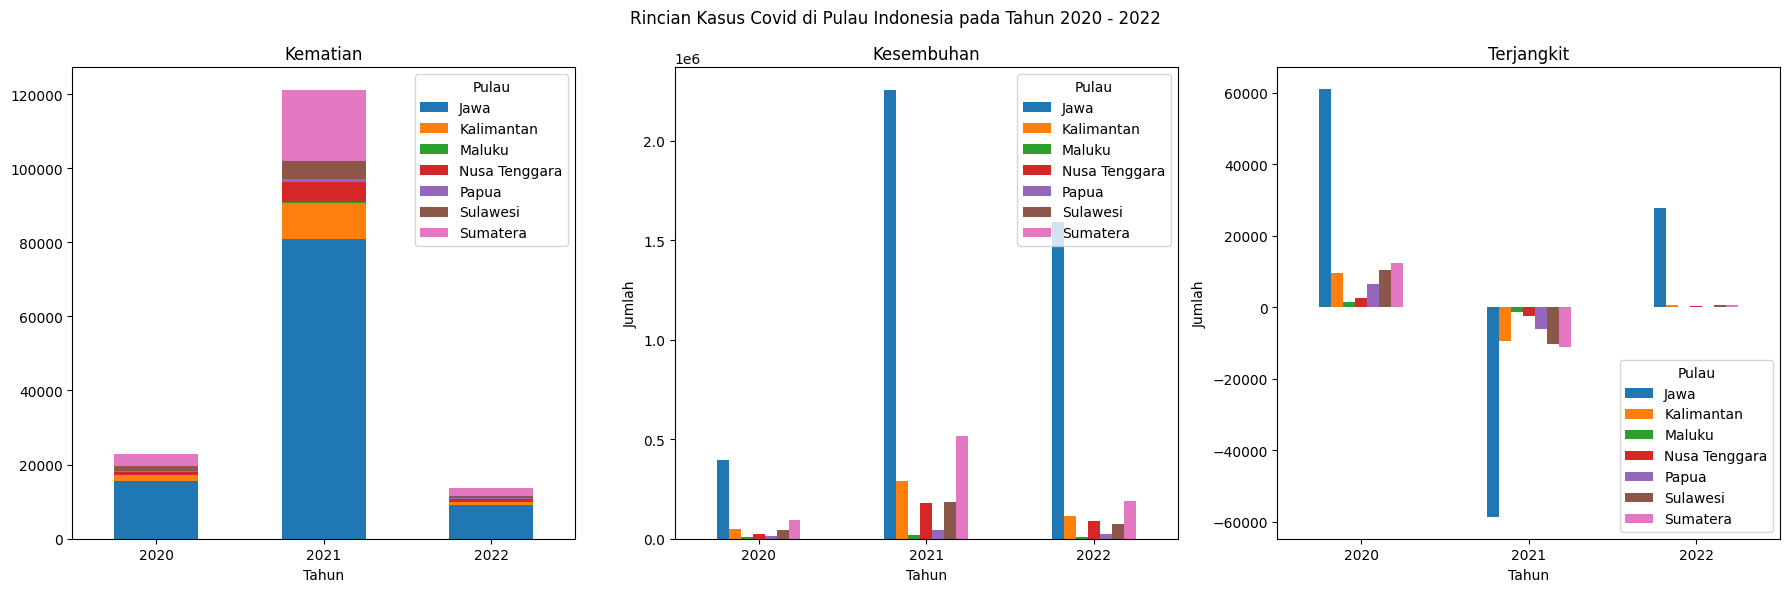

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

count_new_cases = analisis.groupby(['Year', 'Island'])['New Deaths'].sum().unstack()
count_new_cases.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_xticks(range(len(count_new_cases.index)))
ax[0].set_xticklabels(count_new_cases.index, rotation=0, ha='center')
ax[0].legend(title='Pulau', loc='upper right')
ax[0].set_xlabel('Tahun')
ax[1].set_ylabel('Jumlah')
ax[0].set_title('Kematian')

count_new_deaths = analisis.groupby(['Year', 'Island'])['New Recovered'].sum().unstack()
count_new_deaths.plot(kind='bar', stacked=False, ax=ax[1])
ax[1].set_xticks(range(len(count_new_deaths.index)))
ax[1].set_xticklabels(count_new_deaths.index, rotation=0, ha='center')
ax[1].legend(title='Pulau', loc='upper right')
ax[1].set_xlabel('Tahun')
ax[1].set_ylabel('Jumlah')
ax[1].set_title('Kesembuhan')

count_new_deaths = analisis.groupby(['Year', 'Island'])['New Active Cases'].sum().unstack()
count_new_deaths.plot(kind='bar', stacked=False, ax=ax[2])
ax[2].set_xticks(range(len(count_new_deaths.index)))
ax[2].set_xticklabels(count_new_deaths.index, rotation=0, ha='center')
ax[2].legend(title='Pulau', loc='lower right')
ax[2].set_xlabel('Tahun')
ax[2].set_ylabel('Jumlah')
ax[2].set_title('Terjangkit')

plt.suptitle('Rincian Kasus Covid di Pulau Indonesia pada Tahun 2020 - 2022')
plt.tight_layout()
plt.show()

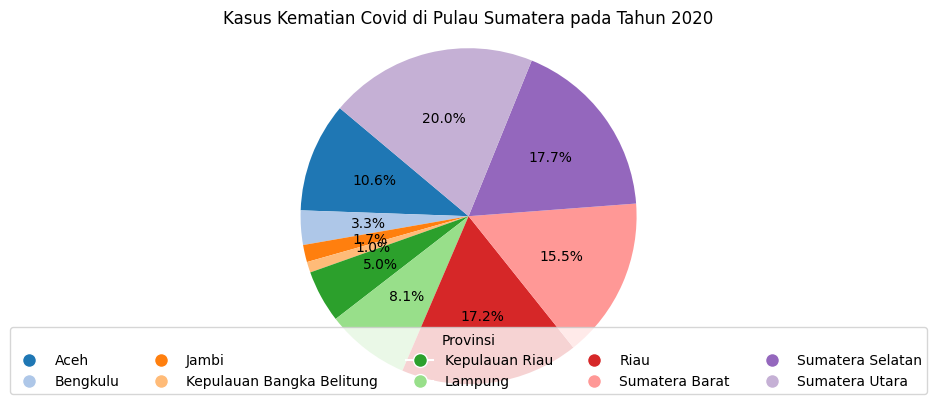

In [32]:
count = analisis.loc[(analisis['Island'] == 'Sumatera') & (analisis['Year'] == 2020)].groupby('Province')['New Deaths'].sum()

colors = plt.cm.tab20.colors  
wedges, texts, autotexts = plt.pie(count, labels=None, autopct='%1.1f%%', startangle=140, colors=colors[:len(count)])

dummy_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=wedges[i].get_facecolor()) for i in range(len(count))]
plt.legend(dummy_handles, count.index, title='Provinsi', loc='lower center', ncol=5)

plt.title('Kasus Kematian Covid di Pulau Sumatera pada Tahun 2020')
plt.axis('equal') 
plt.show()

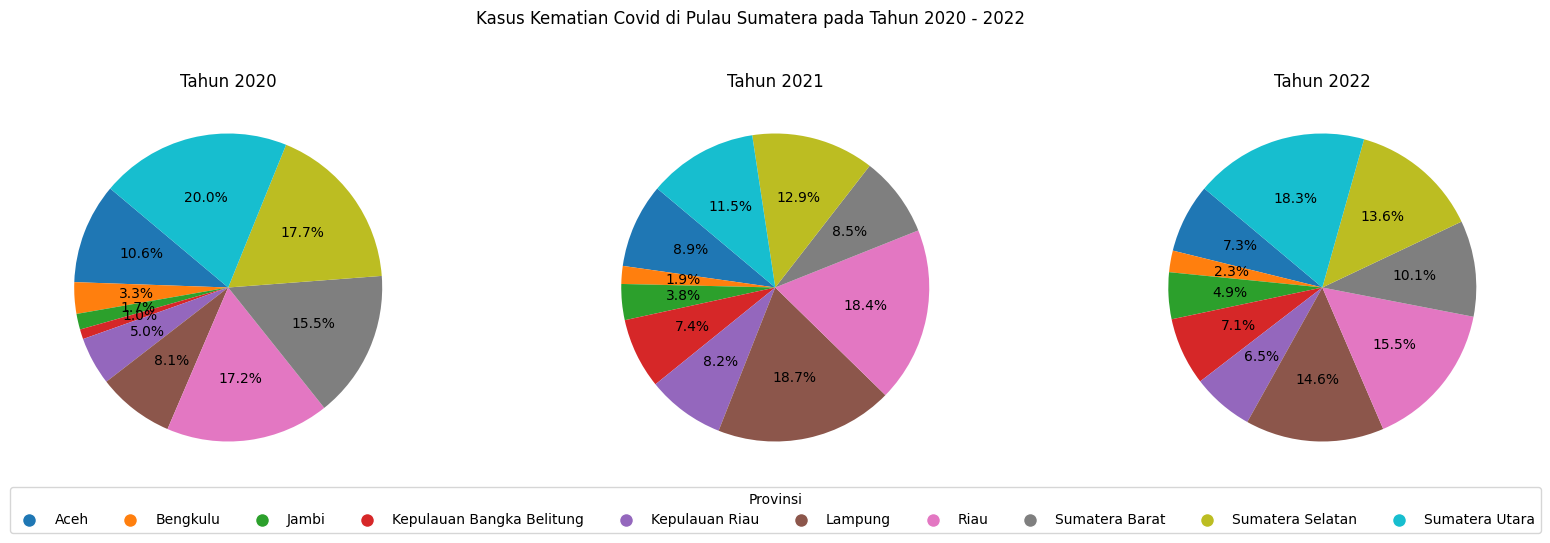

In [33]:
count = analisis[analisis['Island'] == 'Sumatera'].groupby(['Year', 'Province'])['New Deaths'].sum().unstack()
years = count.index
island_colors = {}

fig, axs = plt.subplots(1, len(years), figsize=(20, 5))

for i, year in enumerate(years):
    data = count.loc[year]
    
    wedges, texts, autotexts = axs[i].pie(data, labels=None, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Tahun {year}')
    axs[i].set_ylabel('')
    
    for j, (wedge, island) in enumerate(zip(wedges, data.index)):
        if island not in island_colors:
            island_colors[island] = wedge.get_facecolor()

legend_labels = [f'{island}' for island in island_colors.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color) 
                  for color in island_colors.values()]
plt.legend(legend_handles, legend_labels, title='Provinsi', loc='upper center', ncol=10, 
           bbox_to_anchor=(0.5, 0), bbox_transform=axs[1].transAxes, frameon=True)

plt.suptitle('Kasus Kematian Covid di Pulau Sumatera pada Tahun 2020 - 2022', y=1.05)
plt.subplots_adjust()  
plt.show()